In [75]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

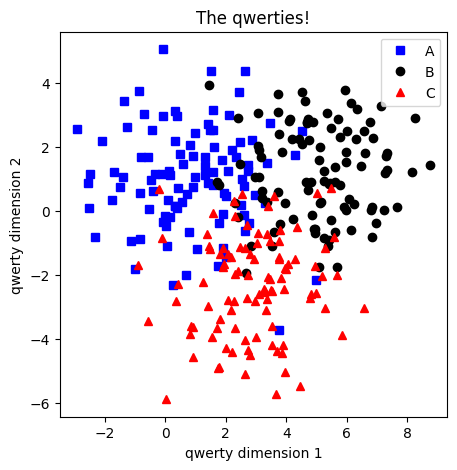

In [76]:
nPerClust = 100
blur = 1.5

A = [1, 1]
B = [5, 1]
C = [3, -2]


# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),np.full((nPerClust,1),2)))

data_np = np.hstack((a,b,c)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.legend(['A','B','C'])
plt.show()

In [77]:
print(labels.shape)
print(labels.dtype)

torch.Size([300, 1])
torch.float32


In [78]:
labels = torch.tensor(labels_np, dtype=torch.long).squeeze()

print(labels.shape)

torch.Size([300])


In [79]:
ANNqwerties = nn.Sequential(
    nn.Linear(2,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,3),
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNqwerties.parameters(), lr = 0.05)


In [80]:
num_epoch = 1000
losses = torch.zeros(num_epoch)
ongoingAcc = torch.zeros(num_epoch)

for epochi in range(num_epoch):
    yHat = ANNqwerties(data)
    
    loss = lossfun(yHat, labels)
    losses[epochi] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = torch.argmax(yHat, axis=1) == labels
    acc = 100 * torch.mean(matches.float())
    ongoingAcc[epochi] = acc

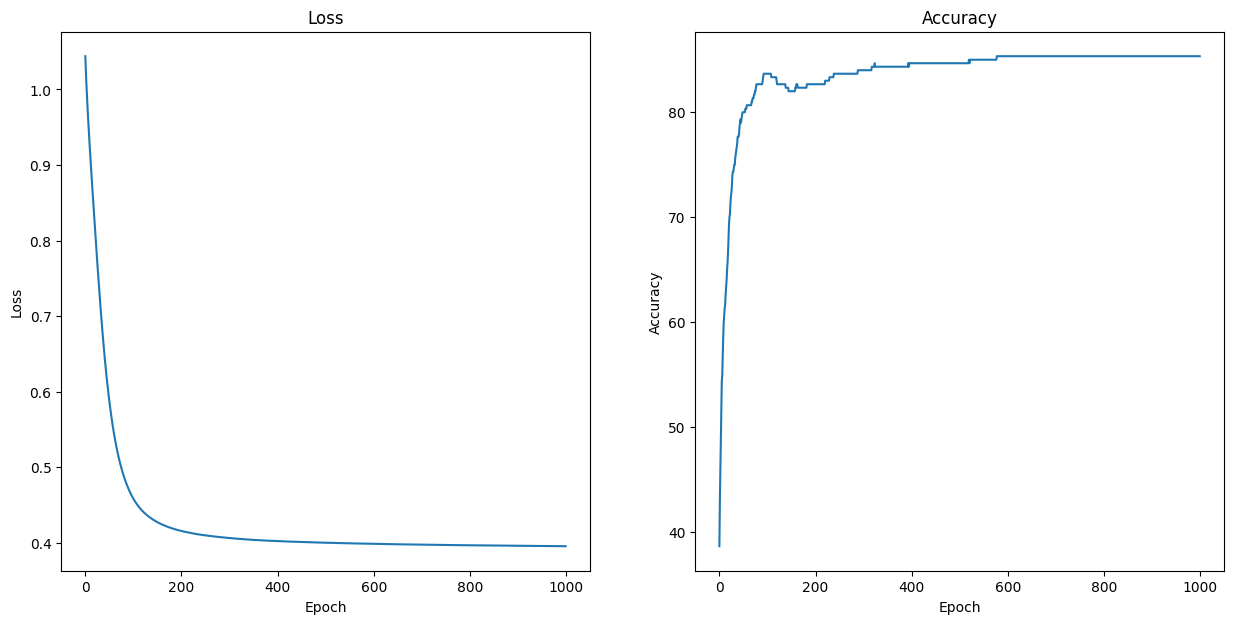

In [81]:
fig, axes = plt.subplots(1, 2,figsize=(15,7))
axes[0].plot(losses)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss")

axes[1].plot(ongoingAcc)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy")
plt.show()


In [83]:
pred = ANNqwerties(data)
pred_label = torch.argmax(pred, dim=1)

accuracy = (pred_label == labels).float().mean()
print("Accuracy: ", accuracy.item()*100)
print(pred.shape)

Accuracy:  85.33333539962769
torch.Size([300, 3])
